arrays are not used to store slds and parameters etc
first simulated data and error made
then 2 versions of esentialy the same function used except one which acts in a loop to complete modeling
the in loop version can switch between mcmc and diff evolution
finaly the nlayers fitted and outputs displayed

In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version))


refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4


In [2]:
figI = 0
# simple structure
thicks_true = [10,120,100,130,10]
bs_true = [0,5,4.5,5,10]
roughs_true = [0,0,0,0,0]
# bs = [5,4.5,5]
# thicks = [120,100,130]
# roughs = [0,0,0]
bs = bs_true
thicks = thicks_true
roughs = roughs_true
loss = 1.
no_layers = len(bs)
no_layers = len(bs_true)
# no_layers = 3
layers = []
names = []
#names = ['layer1','layer2']
for i in range(no_layers):
    names.append('layer'+str(i))
for i in range(no_layers):
        sld = SLD(bs[i],name=names[i])
        layers.append(sld(thicks[i],roughs[i]))
structure = layers[0]
for layer in layers[1:]:
    structure|=layer
print("done")

done


<IPython.core.display.Javascript object>


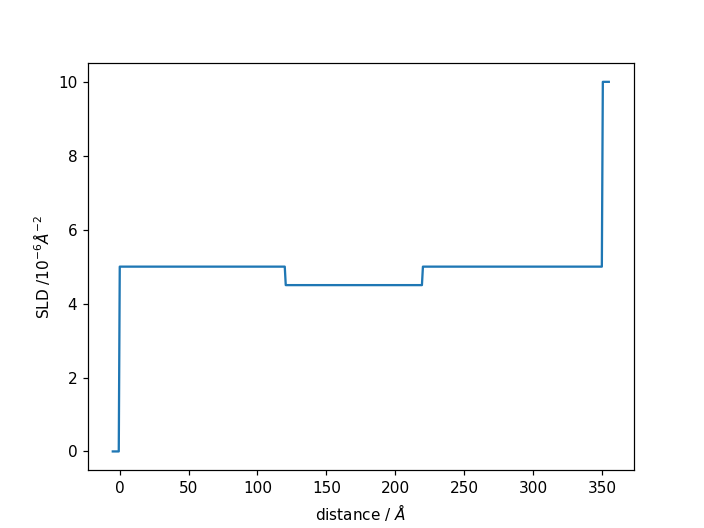

done


In [3]:
%matplotlib notebook
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
print("done")

In [4]:
resolution = 5.
model = ReflectModel(structure, bkg=3e-6, dq=resolution)

<IPython.core.display.Javascript object>


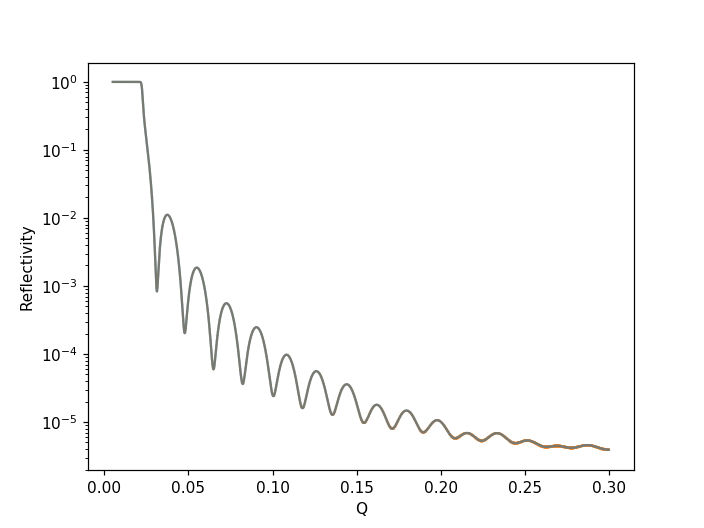

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]


<ErrorbarContainer object of 3 artists>

In [5]:
q = np.linspace(0.005, 0.3, 1001)
plt.figure(figI)
figI+=1
R = model(q, x_err=resolution)
plt.plot(q, R)
plt.xlabel('Q')
plt.ylabel('Reflectivity')
plt.yscale('log')
#Q, R(Q), sig_Q, sig_R =
import make_sim_data as msd
sim_dR = msd.main(sim_q=q,sim_R=R)*10
R = model(q, x_err=resolution)
plt.errorbar(q,R,sim_dR, alpha=0.4)

In [6]:
data = Data1D(data= (q,R,sim_dR))

In [14]:
import seperat as s
outs = s.seperate(data)
print(outs)

refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4
________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1 (fixed)  , bounds=[-inf, inf]>
<Parameter:     'bkg'     , value=3e-06 (fixed)  , bounds=[-inf, inf]>
<Parameter:'dq - resolution', value=5 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:   'air layer'  
<Parameter:'air layer - thick', value=10 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - sld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - rough', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - vol

In [ ]:
print(outs[:,0], outs[:,1])
plt.figure(10)
plt.plot(outs[:,0], outs[:,1])

In [7]:
from seperat import seperateNLayer as snl
ys = []
yMCMCs = []
xs = []
for i in range(1,5):
    y = snl(data, i)
    yMCMC = snl(data, i, doMCMC=True)
    print(i,y, yMCMC)
    ys.append(y)
    yMCMCs.append(yMCMC)
    xs.append(i)

refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4


100%|██████████████████████████████████████| 2000/2000 [03:43<00:00,  8.96it/s]


1 -4586966.636709091 -4586967.66129437


C:\Users\John\Anaconda3\envs\refnx\lib\site-packages\refnx\analysis\curvefitter.py:245: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  size=(_ntemps, nwalkers))
100%|██████████████████████████████████████| 2000/2000 [04:55<00:00,  6.77it/s]


2 -26429.497675107352 -26470.656436500383


100%|██████████████████████████████████████| 2000/2000 [05:35<00:00,  5.96it/s]


3 3838.397679100264 3836.1274677450474


100%|██████████████████████████████████████| 2000/2000 [06:00<00:00,  5.55it/s]


4 3831.514567506651 -166571.17624718798


[1, 2, 3, 4] [-4586966.636709091, -26429.497675107352, 3838.397679100264, 3831.514567506651] [-4586967.66129437, -26470.656436500383, 3836.1274677450474, -166571.17624718798]


<IPython.core.display.Javascript object>


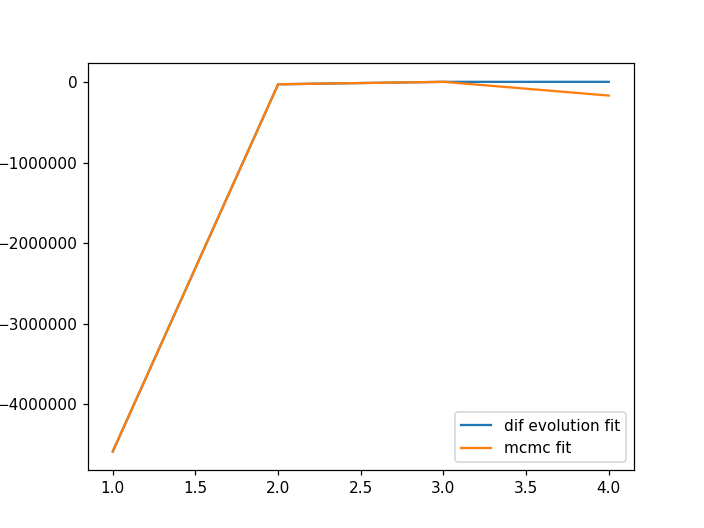

In [6]:
# print(outs[:,0], outs[:,1])
try:
    xs
    if not hasattr(xs, "__iter__"):
        xs=[1, 2, 3, 4]
        ys=[-4586966.636709091, -26429.497675107352, 3838.397679100264, 3831.514567506651]
        yMCMCs=[-4586967.66129437, -26470.656436500383, 3836.1274677450474, -166571.17624718798]
        import matplotlib.pyplot as plt
        %matplotlib notebook
except NameError:
    xs=[1, 2, 3, 4]
    ys=[-4586966.636709091, -26429.497675107352, 3838.397679100264, 3831.514567506651]
    yMCMCs=[-4586967.66129437, -26470.656436500383, 3836.1274677450474, -166571.17624718798]
    import matplotlib.pyplot as plt
    %matplotlib notebook
print(xs, ys, yMCMCs)
plt.figure(10)
plt.plot(xs, ys, label="dif evolution fit")
plt.plot(xs, yMCMCs, label="mcmc fit")
# plt.yscale("log")
plt.legend()

In [7]:
# air = SLD(0,name="air layer")
# airSlab = air(10,0)

# sio2 = SLD(10,name="bottem layer")
# sio2Slab = sio2(10,0)

# structure = airSlab|sio2Slab

# model = ReflectModel(structure, bkg=3e-6, dq=5.0)
# objective = Objective(model, data, transform=Transform('logY'))
# fitter = CurveFitter(objective)
# fitter.fit("differential_evolution")
# print(objective.parameters)
# lp = objective.logpost()
# print("log: ", lp)

# fig, ax = objective.plot()
# figI+=1
# plt.figure(figI)
# figI+=1
# plt.plot(*structure.sld_profile())
# plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
# plt.xlabel('distance / $\AA$');
np.savetxt("outs.txt", [[0,0]])#lp])

________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1 (fixed)  , bounds=[-inf, inf]>
<Parameter:     'bkg'     , value=3e-06 (fixed)  , bounds=[-inf, inf]>
<Parameter:'dq - resolution', value=5 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:   'air layer'  
<Parameter:'air layer - thick', value=10 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - sld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - rough', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - volfrac solvent', value=0 (fixed)  , bounds

<IPython.core.display.Javascript object>


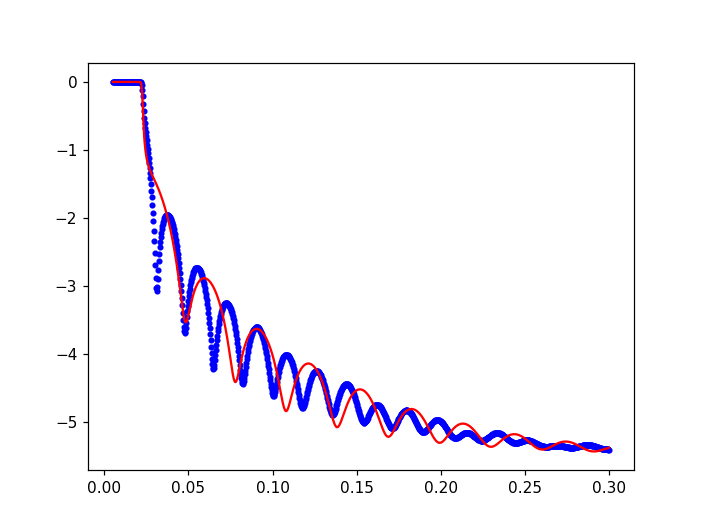

<IPython.core.display.Javascript object>


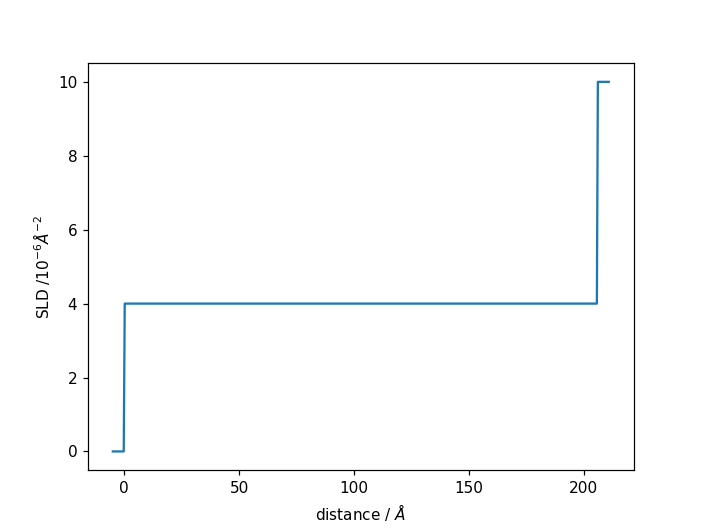

In [8]:
air = SLD(0,name="air layer")
airSlab = air(10,0)

sio2 = SLD(10,name="bottem layer")
sio2Slab = sio2(10,0)

sld1 = SLD(5,name="first layer")
sld1Slab = sld1(350.)

sld1Slab.thick.setp(vary=True, bounds=(50,300))
sld1Slab.sld.real.setp(vary=True, bounds=(4,6))

structure = airSlab|sld1Slab|sio2Slab

model = ReflectModel(structure, bkg=3e-6, dq=5.0)
objective = Objective(model, data, transform=Transform('logY'))
fitter = CurveFitter(objective)
fitter.fit("differential_evolution")
print(objective.parameters)
lp = objective.logpost()
print("log: ", lp)

fig, ax = objective.plot()
figI+=1
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
np.savetxt("outs.txt", [[1,lp]])

________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1 (fixed)  , bounds=[-inf, inf]>
<Parameter:     'bkg'     , value=3e-06 (fixed)  , bounds=[-inf, inf]>
<Parameter:'dq - resolution', value=5 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:   'air layer'  
<Parameter:'air layer - thick', value=10 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - sld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - rough', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - volfrac solvent', value=0 (fixed)  , bounds

<IPython.core.display.Javascript object>


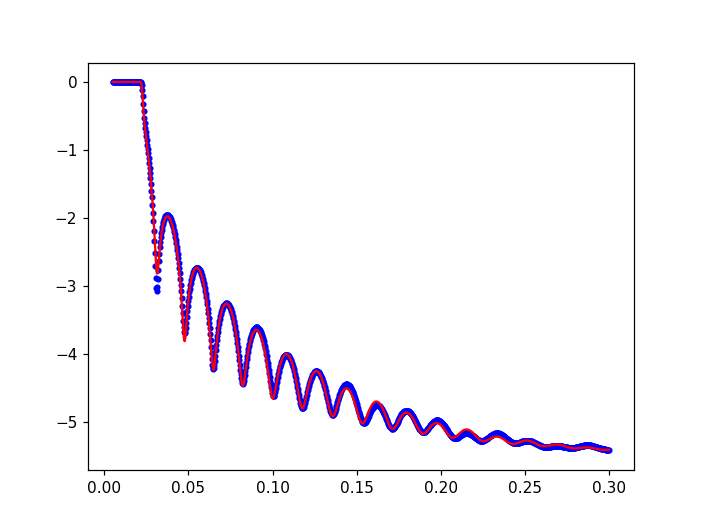

<IPython.core.display.Javascript object>


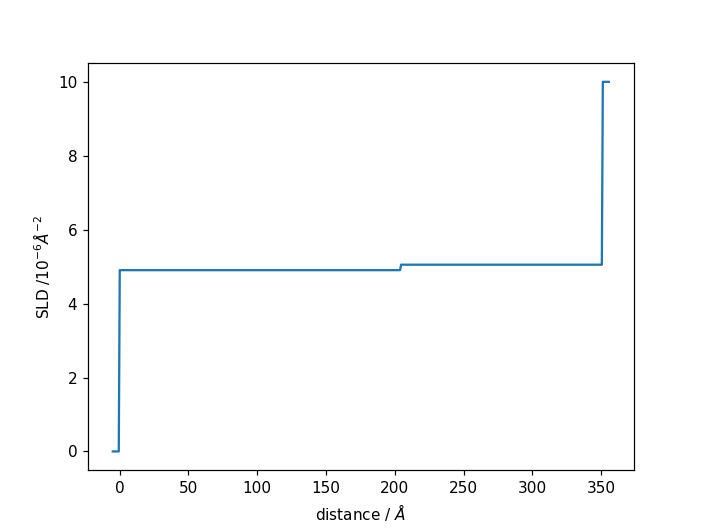

In [9]:
air = SLD(0,name="air layer")
airSlab = air(10,0)

sio2 = SLD(10,name="bottem layer")
sio2Slab = sio2(10,0)

sld1 = SLD(5,name="first layer")
sld1Slab = sld1(350./2,0)

sld2 = SLD(5,name="second layer")
sld2Slab = sld2(350./2,0)

sld1Slab.thick.setp(vary=True, bounds=(50,300))
sld1Slab.sld.real.setp(vary=True, bounds=(4,6))

sld2Slab.thick.setp(vary=True, bounds=(50,300))
sld2Slab.sld.real.setp(vary=True, bounds=(4,6))

structure = airSlab|sld1Slab|sld2Slab|sio2Slab

model = ReflectModel(structure, bkg=3e-6, dq=5.0)
objective = Objective(model, data, transform=Transform('logY'))
fitter = CurveFitter(objective)
fitter.fit("differential_evolution")
print(objective.parameters)
lp = objective.logpost()
print("log: ", lp)

fig, ax = objective.plot()
figI+=1
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
np.savetxt("outs.txt", [[2,lp]])

________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1 (fixed)  , bounds=[-inf, inf]>
<Parameter:     'bkg'     , value=3e-06 (fixed)  , bounds=[-inf, inf]>
<Parameter:'dq - resolution', value=5 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:   'air layer'  
<Parameter:'air layer - thick', value=10 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - sld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - rough', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - volfrac solvent', value=0 (fixed)  , bounds

<IPython.core.display.Javascript object>


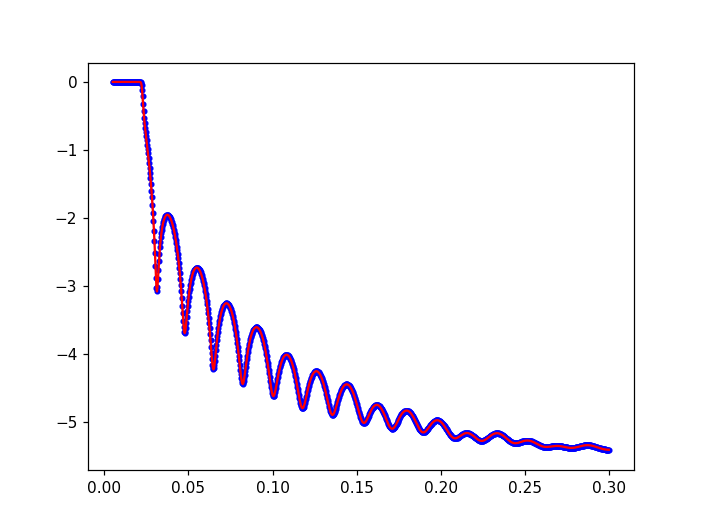

<IPython.core.display.Javascript object>


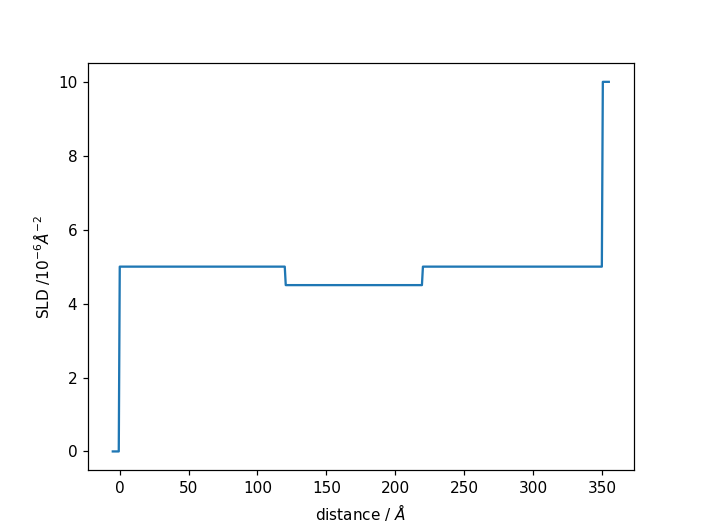

In [10]:
air = SLD(0,name="air layer")
airSlab = air(10,0)

sio2 = SLD(10,name="bottem layer")
sio2Slab = sio2(10,0)

sld1 = SLD(5,name="first layer")
sld1Slab = sld1(350./3,0)

sld2 = SLD(5,name="second layer")
sld2Slab = sld2(350./3,0)

sld3 = SLD(5,name="second layer")
sld3Slab = sld3(350./3,0)

sld1Slab.thick.setp(vary=True, bounds=(50,250))
sld1Slab.sld.real.setp(vary=True, bounds=(4,6))

sld2Slab.thick.setp(vary=True, bounds=(50,250))
sld2Slab.sld.real.setp(vary=True, bounds=(4,6))

sld3Slab.thick.setp(vary=True, bounds=(50,250))
sld3Slab.sld.real.setp(vary=True, bounds=(4,6))

structure = airSlab|sld1Slab|sld2Slab|sld3Slab|sio2Slab

model = ReflectModel(structure, bkg=3e-6, dq=5.0)
objective = Objective(model, data, transform=Transform('logY'))
fitter = CurveFitter(objective)
fitter.fit("differential_evolution")
print(objective.parameters)
lp = objective.logpost()
print("log: ", lp)

fig, ax = objective.plot()
figI+=1
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
np.savetxt("outs.txt", [[3,lp]])

________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1 (fixed)  , bounds=[-inf, inf]>
<Parameter:     'bkg'     , value=3e-06 (fixed)  , bounds=[-inf, inf]>
<Parameter:'dq - resolution', value=5 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:   'air layer'  
<Parameter:'air layer - thick', value=10 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - sld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - rough', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'air layer - volfrac solvent', value=0 (fixed)  , bounds

<IPython.core.display.Javascript object>


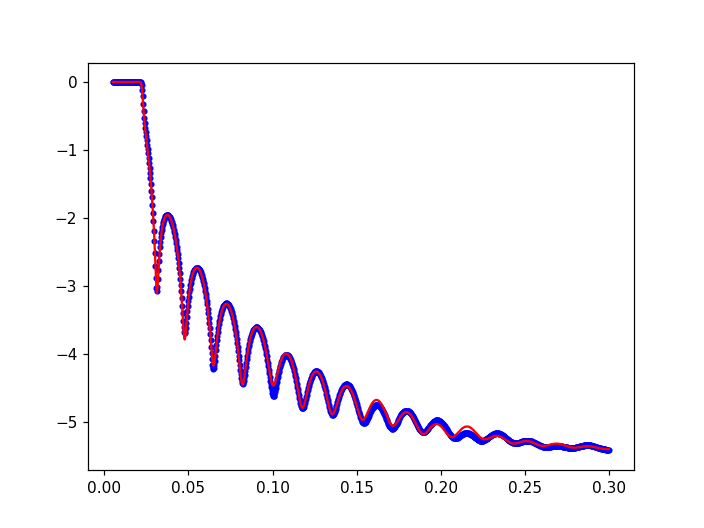

<IPython.core.display.Javascript object>


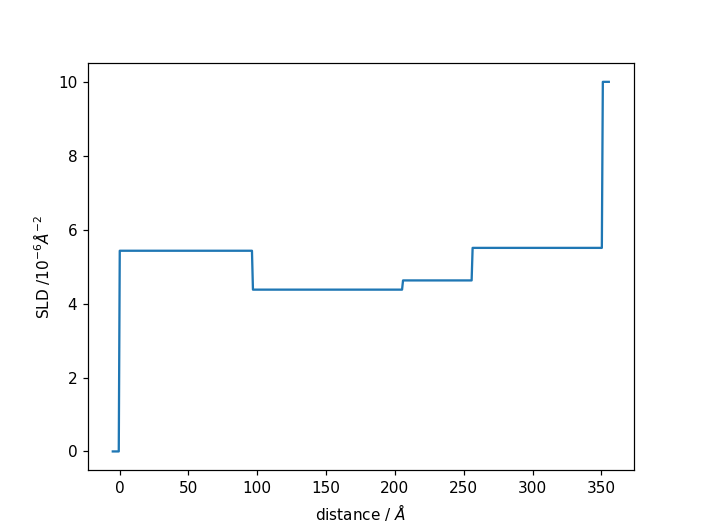

In [11]:
air = SLD(0,name="air layer")
airSlab = air(10,0)

sio2 = SLD(10,name="bottem layer")
sio2Slab = sio2(10,0)

sld1 = SLD(5,name="first layer")
sld1Slab = sld1(350./4,0)

sld2 = SLD(5,name="second layer")
sld2Slab = sld2(350./4,0)

sld3 = SLD(5,name="second layer")
sld3Slab = sld3(350./4,0)

sld4 = SLD(5,name="second layer")
sld4Slab = sld4(350./4,0)

sld1Slab.thick.setp(vary=True, bounds=(50,250))
sld1Slab.sld.real.setp(vary=True, bounds=(4,6))

sld2Slab.thick.setp(vary=True, bounds=(50,250))
sld2Slab.sld.real.setp(vary=True, bounds=(4,6))

sld3Slab.thick.setp(vary=True, bounds=(50,250))
sld3Slab.sld.real.setp(vary=True, bounds=(4,6))

sld4Slab.thick.setp(vary=True, bounds=(50,250))
sld4Slab.sld.real.setp(vary=True, bounds=(4,6))

structure = airSlab|sld1Slab|sld2Slab|sld3Slab|sld4Slab|sio2Slab

model = ReflectModel(structure, bkg=3e-6, dq=5.0)
objective = Objective(model, data, transform=Transform('logY'))
fitter = CurveFitter(objective)
fitter.fit("differential_evolution")
print(objective.parameters)
lp = objective.logpost()
print("log: ", lp)

fig, ax = objective.plot()
figI+=1
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
np.savetxt("outs.txt", [[4,lp]])

In [12]:
np.savetxt("outs.txt", [[4,3]])